In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#read all CSV
csv = pd.read_csv('LEGO_database.csv')
themes = pd.read_csv('themes.csv')

In [51]:
#filter database - sets from 1990-2020 - already retired sets to study just the secondary market
csv = csv[(csv['year'] <= 2020)]

In [52]:
#pick 100 rows randomly from filtred database
np.random.seed(0)
random_indices = np.random.choice(csv.index, 100, replace=False)
time_series = csv.loc[random_indices]

time_series

,set_num,name_sets,year,theme_id,num_parts,img_url,name_themes,Release_date,Retire_date,Retail,Current_value,HPR,HPY,APR,Sharpe
992,70624-1,Vermillion Invader,2017,435,313,https://cdn.rebrickable.com/media/sets/70624-1...,Ninjago,02.01.2017,28.11.2017,29.99,101.89,3.397466,2.397466,0.485352,TBC
1125,40271-1,Bunny,2018,610,126,https://cdn.rebrickable.com/media/sets/40271-1...,Brickheadz,02.02.2018,17.03.2018,9.99,10.81,1.082082,0.082082,0.180347,TBC
1555,75268-1,Snowspeeder,2020,158,91,https://cdn.rebrickable.com/media/sets/75268-1...,Star Wars,02.01.2020,20.09.2021,19.99,19.71,0.985993,-0.014007,0.246498,TBC
1220,75204-1,Sandspeeder,2018,158,278,https://cdn.rebrickable.com/media/sets/75204-1...,Star Wars,02.12.2017,14.04.2018,39.99,52.55,1.314079,0.314079,0.219013,TBC
1115,41341-1,Andrea's Bedroom,2018,494,85,https://cdn.rebrickable.com/media/sets/41341-1...,Friends,02.06.2018,10.12.2018,9.99,12.95,1.296296,0.296296,0.216049,TBC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,41604-1,Iron Man MK50,2018,610,101,https://cdn.rebrickable.com/media/sets/41604-1...,Brickheadz,02.04.2018,25.11.2018,9.99,31.68,3.171171,2.171171,0.528529,TBC
579,21104-1,NASA Mars Science Laboratory Curiosity Rover,2014,576,295,https://cdn.rebrickable.com/media/sets/21104-1...,LEGO Ideas and CUUSOO,10.01.2014,14.04.2014,29.99,369.60,12.324108,11.324108,1.232411,TBC
1072,70658-1,Oni Titan,2018,435,530,https://cdn.rebrickable.com/media/sets/70658-1...,Ninjago,01.08.2018,02.08.2019,49.99,116.04,2.321264,1.321264,0.386877,TBC
223,19710-1,Sears Tower (Brickstructures Version),2008,252,68,https://cdn.rebrickable.com/media/sets/19710-1...,Architecture,01.01.2008,01.01.2010,26.39,1365.90,51.758242,50.758242,3.234890,TBC


In [53]:
time_series.to_csv('time_series.csv', index=False)

<BarContainer object of 17 artists>

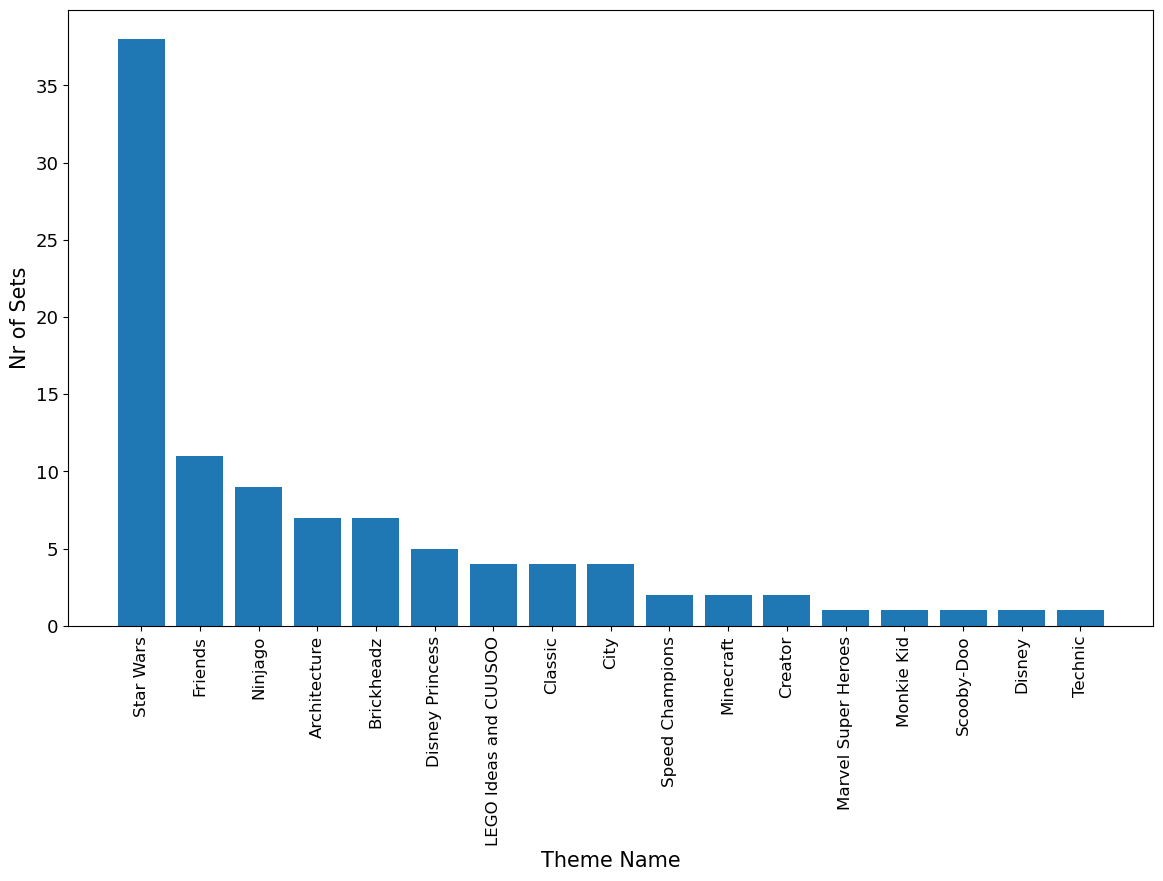

In [54]:
#number of sets per theme in filtered database
set_theme_count = time_series["theme_id"].value_counts()
set_theme_count = pd.DataFrame({"id" : set_theme_count.index, "set_count" : set_theme_count.values})
merged_df = pd.merge(set_theme_count, themes, on="id")

plt.figure(figsize=(14,8))
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=13)
plt.ylabel('Nr of Sets', fontsize=15)
plt.xlabel('Theme Name', fontsize=15)
 
plt.bar(merged_df.name, merged_df.set_count)